In [1]:
import wandb
api = wandb.Api()

In [2]:
from typing import Any, Dict


def unflatten(
    d: Dict[str, Any],
    base: Dict[str, Any] = None,
) -> Dict[str, Any]:
    """Convert any keys containing dotted paths to nested dicts

    >>> unflatten({'a': 12, 'b': 13, 'c': 14})  # no expansion
    {'a': 12, 'b': 13, 'c': 14}

    >>> unflatten({'a.b.c': 12})  # dotted path expansion
    {'a': {'b': {'c': 12}}}

    >>> unflatten({'a.b.c': 12, 'a': {'b.d': 13}})  # merging
    {'a': {'b': {'c': 12, 'd': 13}}}

    >>> unflatten({'a.b': 12, 'a': {'b': 13}})  # insertion-order overwrites
    {'a': {'b': 13}}

    >>> unflatten({'a': {}})  # insertion-order overwrites
    {'a': {}}
    """
    if base is None:
      base = {}

    for key, value in d.items():
        root = base

        ###
        # If a dotted path is encountered, create nested dicts for all but
        # the last level, then change root to that last level, and key to
        # the final key in the path.
        #
        # This allows one final setitem at the bottom of the loop.
        #
        if '.' in key:
            *parts, key = key.split('.')

            for part in parts:
                root.setdefault(part, {})
                root = root[part]

        if isinstance(value, dict):
            value = unflatten(value, root.get(key, {}))

        root[key] = value

    return base

In [3]:
run = api.run('ppierzc/propose_human36m/23ooc84a')

In [4]:
dir(run)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_base_dir',
 '_entity',
 '_exec',
 '_files',
 '_full_history',
 '_repr_html_',
 '_sampled_history',
 '_state',
 '_summary',
 'client',
 'create',
 'delete',
 'dir',
 'display',
 'entity',
 'file',
 'files',
 'history',
 'id',
 'json_config',
 'lastHistoryStep',
 'load',
 'log_artifact',
 'logged_artifacts',
 'name',
 'path',
 'project',
 'save',
 'scan_history',
 'snake_to_camel',
 'state',
 'storage_id',
 'summary',
 'sweep',
 'to_html',
 'update',
 'upload_file',
 'url',
 'use_artifact',
 'used_artifacts',
 'user',
 'username',
 'wait_until_finished']

In [5]:
hist = run.history(pandas=False)

In [6]:
import numpy as np
for key in hist[0]:
    vals = hist[0][key]
    if isinstance(vals, list):
        vals = list(filter(lambda x: isinstance(x, float), vals))
        print(key, np.nanmean(vals))

occluded.RElbow 39.98821722494589
not_occluded.RHip 7.5360721995249955
not_occluded.LHip 7.590795185490103
not_occluded.Spine 12.12102198760989
occluded.LFoot 218.6505889892578
not_occluded.LFoot 33.33805046290879
occluded.RWrist 50.94922693931695
not_occluded.LKnee 23.457726349087345
not_occluded.RKnee 20.57112950152665
not_occluded.RElbow 27.85573339524361
occluded.Spine 26.869256258010864
occluded.RHip 7.018084737585812
not_occluded.LElbow 23.797735909493923
not_occluded.RWrist 30.112076330411824
not_occluded.LShoulder 19.159273912422474
occluded.LElbow 46.09522507692638
occluded.RShoulder 80.88758341471355
occluded.LShoulder 24.93131806272449
occluded.RKnee 178.8776626586914
not_occluded.RShoulder 19.184092384607712
occluded.LHip 10.717097610235214
not_occluded.LWrist 28.059191589709922
occluded.Head 58.160863161087036
occluded.LKnee 64.12350618562033
not_occluded.Thorax 11.822708971505035
occluded.Thorax 68.69138622283936
occluded.LWrist 33.164329528808594
not_occluded.Head 23.118

In [7]:
for i in hist[0]:
    if isinstance(hist[0][i], list):
        hist[0][i] = np.array(hist[0][i])

In [8]:
data = unflatten(hist[0])

In [9]:
data.keys()

dict_keys(['occluded', 'not_occluded', '_step', 'img', '_runtime', '_timestamp'])

In [10]:
from propose.poses.human36m import Human36mPose
from propose.datasets.human36m.Human36mDataset import Human36mDataset
pose = Human36mPose(np.zeros((16, 2)))
marker_names = pose.marker_names[1:]
del marker_names[8]

In [11]:
import pandas as pd

In [12]:
data

{'occluded': {'RElbow': array([None, None, None, ..., None, None, None], dtype=object),
  'LFoot': array([None, None, None, ..., None, None, None], dtype=object),
  'RWrist': array([None, None, None, ..., None, None, 44.81532287597656], dtype=object),
  'Spine': array([None, None, None, ..., None, None, None], dtype=object),
  'RHip': array([None, None, None, ..., None, None, None], dtype=object),
  'LElbow': array([None, None, None, ..., None, None, None], dtype=object),
  'RShoulder': array([None, None, None, ..., None, None, None], dtype=object),
  'LShoulder': array([None, None, None, ..., None, None, None], dtype=object),
  'RKnee': array([None, None, None, ..., None, None, None], dtype=object),
  'LHip': array([None, None, None, ..., None, None, None], dtype=object),
  'Head': array([None, None, None, ..., None, None, None], dtype=object),
  'LKnee': array([None, None, None, ..., None, None, None], dtype=object),
  'Thorax': array([None, None, None, ..., None, None, None], dtype=

In [13]:
test_dataset = Human36mDataset(
    dirname="/data/human36m/processed",
    mpii=True,
    use_variance=True,
    occlusion_fractions=[],
    test=True,
)

Preparing test dataset: 100%|██████████| 24191/24191 [00:16<00:00, 1446.07it/s]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

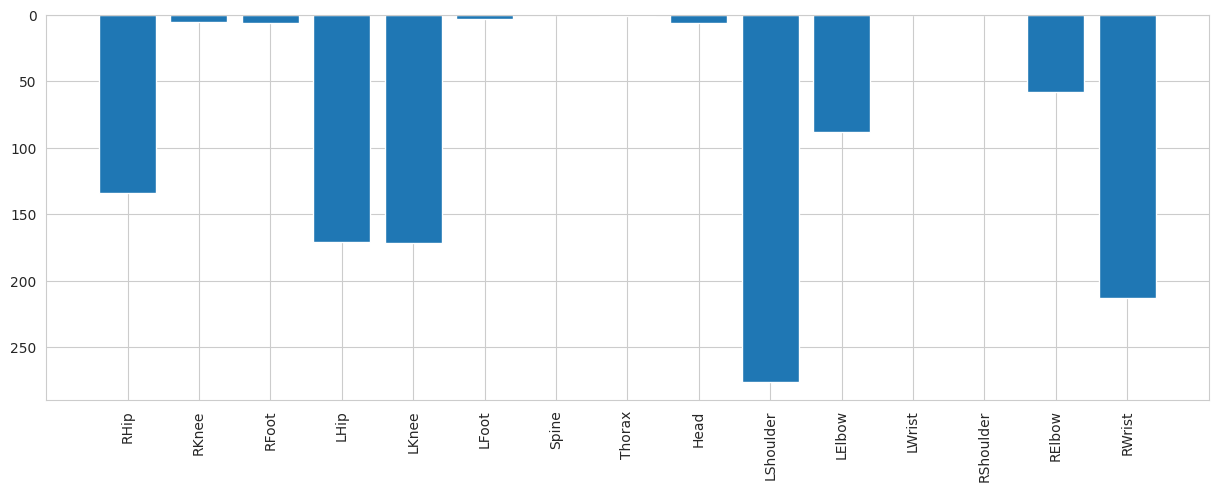

In [20]:
occlusions = test_dataset.occlusions.astype(int).sum(0)

marker_names = Human36mPose(np.zeros((16, 2))).marker_names[1:]
del marker_names[8]

In [47]:
occlusion_df = pd.DataFrame(occlusions, columns=['frequency'], index=marker_names).reset_index()

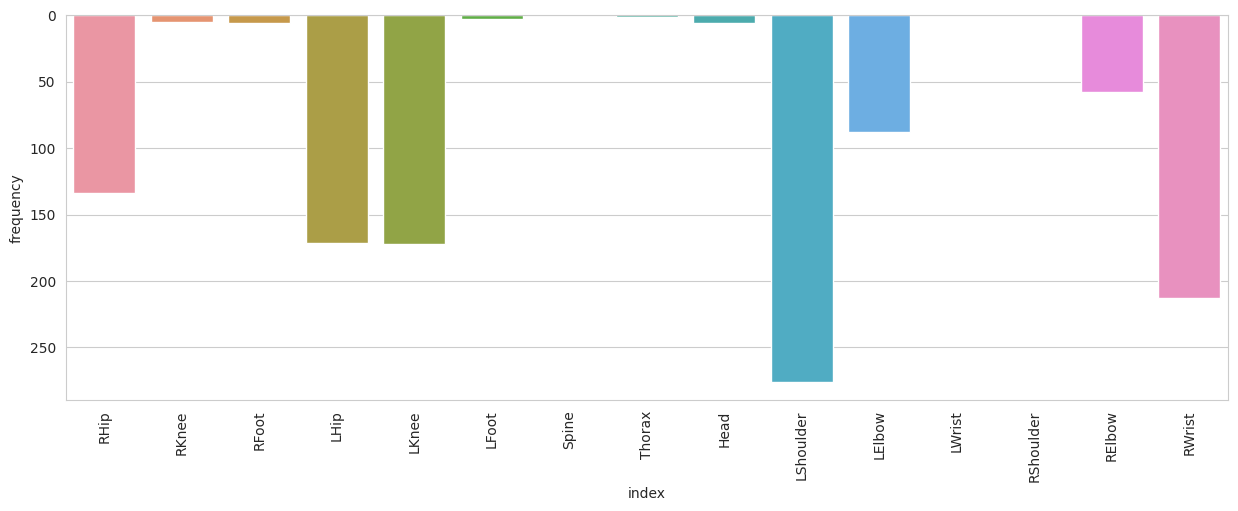

In [48]:

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 5))
    sns.barplot(data=occlusion_df, x='index', y='frequency')
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
df_occluded = pd.DataFrame(
        data['occluded']
)

df_not_occluded = pd.DataFrame(
    data['not_occluded']
)

In [69]:
df = (
    pd.concat(
        [df_not_occluded[marker_names], df_occluded[marker_names]], keys=["Not Occluded", "Occluded"], axis=1
    )
    .stack()
    .stack()
    .to_frame()
    .reset_index()
)

In [ ]:
print(occlusions / occlusions.sum())
freqs = occlusions / occlusions.sum()

In [ ]:
E_err_occl = 0
E_err_noccl = 0

for key in data['occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['occluded'][key])))
    E_err_occl += freqs[marker_names.index(key)] * mean_joint_error

for key in data['not_occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['not_occluded'][key])))
    E_err_occl += freqs[marker_names.index(key)] * mean_joint_error

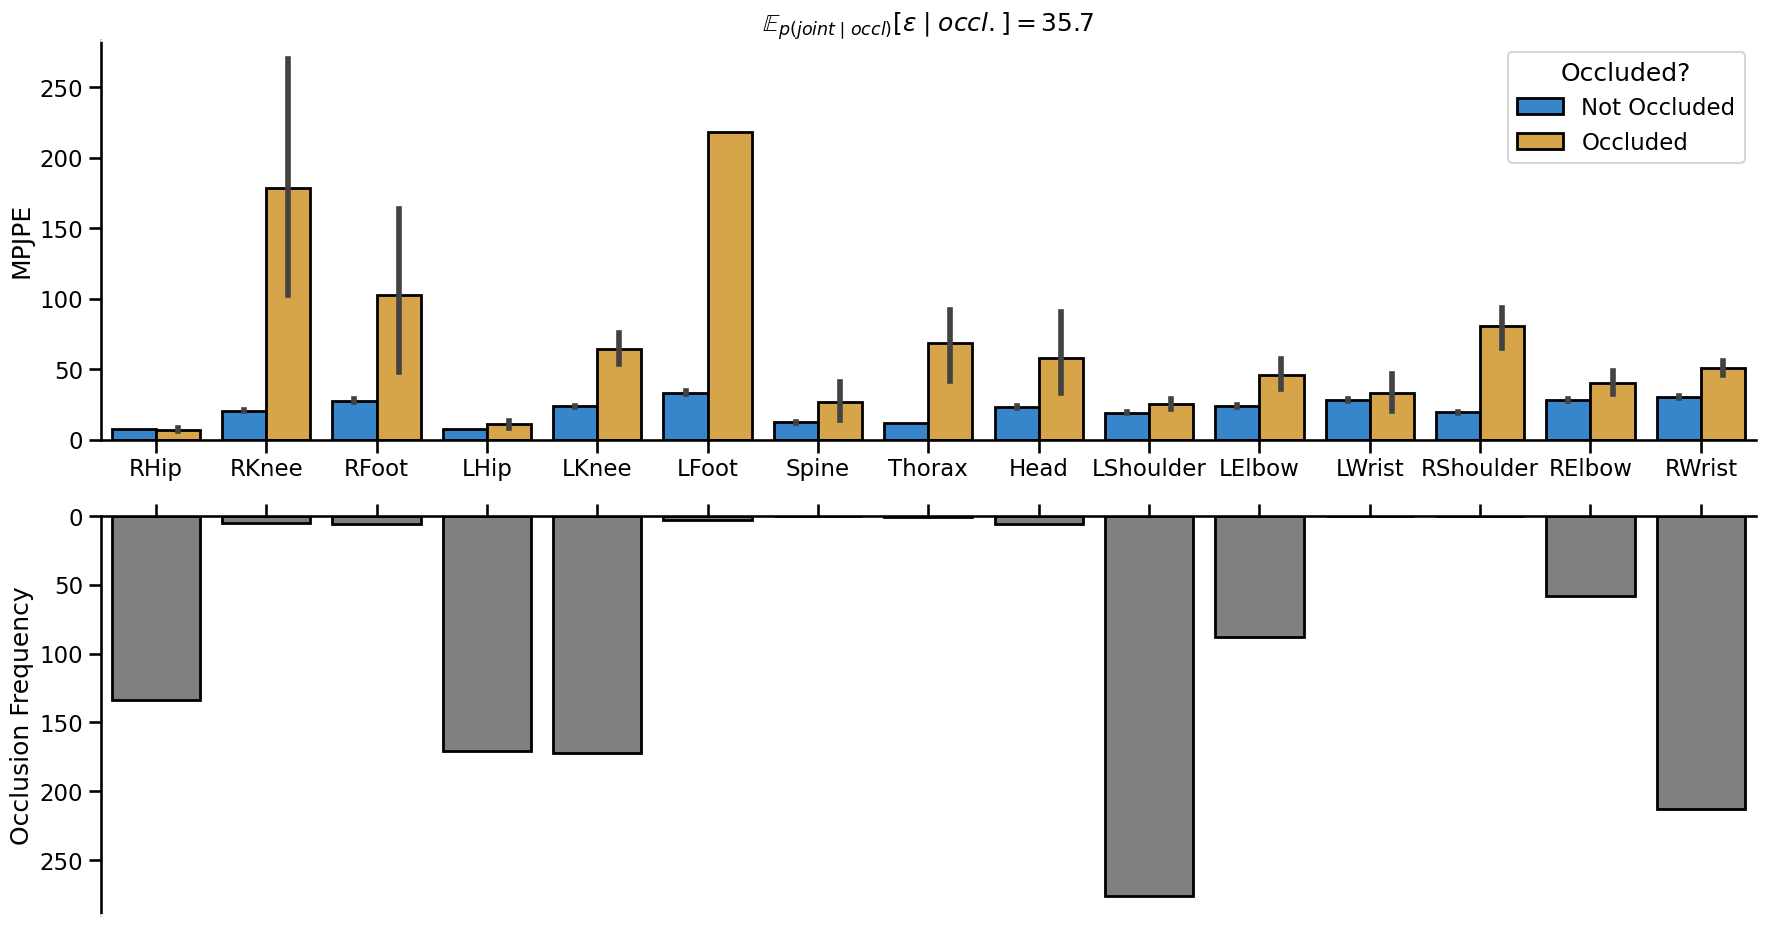

In [107]:
sns.set_context('talk')

plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=df, x="level_1", y=0, hue="level_2", palette=["#1E88E5", "#EDAC32"], edgecolor='k', linewidth=2)
plt.xticks(None)
plt.ylabel("MPJPE")
plt.xlabel("")
plt.legend(title="Occluded?")
plt.gca().spines['top'].set_color('w')
plt.gca().spines['bottom'].set_color('k')
plt.gca().spines['right'].set_color('w')

plt.subplot(2, 1, 2)
sns.barplot(data=occlusion_df, x='index', y='frequency', color="gray", edgecolor='k', linewidth=2)
plt.xticks(rotation=0)
plt.gca().invert_yaxis()
plt.ylabel("Occlusion Frequency")
plt.xlabel("")
# plt.xticks([], [])
plt.tight_layout()

plt.gca().spines['top'].set_color('k')
plt.gca().spines['bottom'].set_color('w')
plt.gca().spines['right'].set_color('w')

plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.gca().set_xticklabels([])

plt.show()

In [85]:

list(filter(lambda x: x, data['occluded']['RElbow']))

[29.170753479003906,
 21.53282356262207,
 18.29642105102539,
 22.394620895385742,
 86.70138549804688,
 34.313560485839844,
 70.57051086425781,
 28.61638832092285,
 28.367992401123047,
 18.132423400878906,
 40.30168533325195,
 28.09601402282715,
 27.30866241455078,
 47.56503677368164,
 43.65159225463867,
 27.392501831054688,
 112.04410552978516,
 19.787729263305664,
 87.02082824707031,
 17.42546272277832,
 60.403507232666016,
 6.389738082885742,
 31.711809158325195,
 14.628047943115234,
 48.37766647338867,
 32.628662109375,
 84.16743469238281,
 19.675878524780273,
 107.04711151123047,
 11.496131896972656,
 36.24452590942383,
 65.02174377441406,
 61.47260284423828,
 26.982587814331055,
 15.109489440917969,
 21.63681411743164,
 27.87978744506836]

In [94]:
print(occlusions / occlusions.sum())
freqs = occlusions / occlusions.sum()

[0.11827008 0.00441306 0.00529568 0.15092674 0.15180936 0.00264784
 0.         0.00088261 0.00529568 0.24360106 0.0776699  0.
 0.         0.05119153 0.18799647]


In [102]:
score = 0
for key in data['occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['occluded'][key])))
    score += freqs[marker_names.index(key)] * mean_joint_error
score

35.74222566777311

In [101]:
score = 0
for key in data['not_occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['not_occluded'][key])))
    score += freqs[marker_names.index(key)] * mean_joint_error
score

19.659107235190973

In [104]:
score = 0
for key in data['occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['occluded'][key])))
    score += mean_joint_error / len(marker_names)
score

67.46083859160723

In [106]:
score = 0
for key in data['not_occluded']:
    mean_joint_error = np.mean(list(filter(lambda x: x, data['not_occluded'][key])))
    score += mean_joint_error / len(marker_names)
score

21.027287777962947